#Yapay sinir ağları Iris veri seti ile Uygulama


## Gerekli kütüphanelerin yüklenmesi

**TensorFlow:** Google tarafından geliştirilen açık kaynaklı bir derin öğrenme kütüphanesidir. Derin öğrenme modellerini oluşturmak ve eğitmek için güçlü araçlar sunar.

**Keras: **TensorFlow'un bir yüksek seviyeli API'sidir. Kullanıcı dostu ve hızlı bir şekilde derin öğrenme modelleri geliştirmeye olanak tanır. Keras, TensorFlow içinde yerleşik olarak bulunur ve TensorFlow'un arka ucunu kullanarak çalışır.

*   **Sequential Model:** Bu model, katmanların sıralı bir şekilde eklenmesine olanak tanır. Kullanımı çok basittir ve katmanlar bir liste gibi eklenir.
*   **Functional API:** Daha karmaşık modeller için kullanılır. Bu API, bir katmanın çıktısını diğer bir katmana girdi olarak verebilme esnekliği sağlar.



Keras kullanarak bir yapay sinir ağı oluşturmak oldukça basittir. *Sequential modeli*, katmanları sıralı olarak tanımlamamıza olanak tanır. *Dense katmanı* ise tam bağlantılı katmanları temsil eder.

**scikit-learn:** Python'da makine öğrenimi için kullanılan popüler bir kütüphanedir. Veri ön işleme, model oluşturma, model eğitimi ve değerlendirme için çok sayıda araç sunar. Bu kütüphane, sınıflandırma, regresyon, kümeleme ve daha birçok makine öğrenimi algoritmasını içerir.

Veri seti yüklemek, veriyi bölmek ve etiketleri dönüştürmek için kullanılır.


**Matplotlib:** Python'da veri görselleştirme için kullanılan bir kütüphanedir. Çeşitli grafik türlerini (çizgi grafikleri, çubuk grafikleri, histogramlar, vs.) oluşturmak için kullanılır.

In [ ]:
!pip install tensorflow scikit-learn matplotlib

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

## Veri Seti

Bu veri seti, üç farklı iris türünü (setosa, versicolor, ve virginica) sınıflandırmak için kullanılır ve her biri dört özellik içerir.

**Veri Setinin Özellikleri**

* Toplam Örnek Sayısı: 150
* Sınıf Sayısı: 3 (Iris setosa, Iris versicolor, Iris virginica)
* Özellik Sayısı: 4

**Özellikler (Attributes)**
* Sepal Length (cm): Çanak yaprak uzunluğu
* Sepal Width (cm): Çanak yaprak genişliği
* Petal Length (cm): Taç yaprak uzunluğu
* Petal Width (cm): Taç yaprak genişliği

**Sınıflar (Classes)**
* Iris setosa
* Iris versicolor
* Iris virginica

In [ ]:
iris = load_iris()
data = iris.data
labels = iris.target

### Veri seti görselleştirme
Pairplot (Çiftli Grafik)

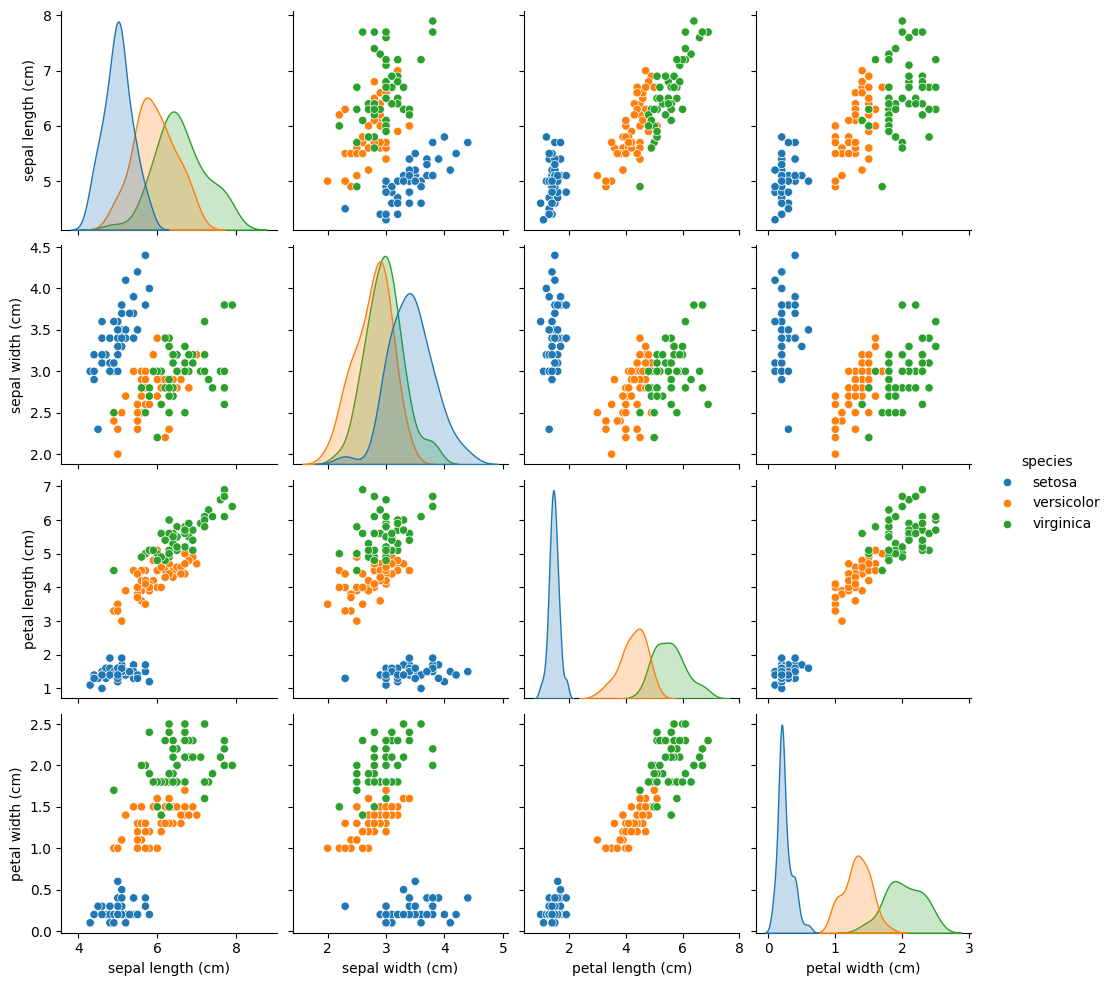

In [ ]:
# Iris veri setini yükleyin
iris_data = load_iris()
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris['species'] = iris_data.target

# Hedef değişkeni isimlendirin
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris['species'] = iris['species'].map(species_map)

# Pairplot'u oluşturun
sns.pairplot(iris, hue='species')

# Grafiği gösterin
plt.show()


## Veri dönüşümü

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

## Eğitim Test verisi ayırma

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

## YSA Model Oluşturma

Model başlatma -> model = Sequential()

Katmanları Eklemek
* İlk katmanımız Dense katmanı olacak ve relu aktivasyon fonksiyonunu kullanacak. İlk katman için input_dim argümanı ile giriş boyutunu belirtmeliyiz (iris veri setinde 4 özellik var)

* Çıkış katmanı, sınıflandırma problemi için softmax aktivasyon fonksiyonunu kullanacak ve 3 sınıf (setosa, versicolor, virginica) için 3 nöron içerecek.

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

## Model derleyin
fit metodu, eğitim verilerini, etiketleri, epoch sayısını, batch boyutunu ve doğrulama verisini alır:


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model Eğitimi

In [ ]:
history = model.fit(train_data, train_labels, epochs=50, batch_size=5, validation_data=(test_data, test_labels))

Epoch 1/50
24/24 [==============================] - 1s 13ms/step - loss: 3.6922 - accuracy: 0.3333 - val_loss: 3.1815 - val_accuracy: 0.3333
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 2.7347 - accuracy: 0.3333 - val_loss: 2.2535 - val_accuracy: 0.3333
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 1.9789 - accuracy: 0.3333 - val_loss: 1.5890 - val_accuracy: 0.3333
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 1.4714 - accuracy: 0.3417 - val_loss: 1.2148 - val_accuracy: 0.4667
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 1.1824 - accuracy: 0.4833 - val_loss: 1.0238 - val_accuracy: 0.6667
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0145 - accuracy: 0.5833 - val_loss: 0.9253 - val_accuracy: 0.7000
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.9335 - accuracy: 0.6250 - val_loss: 0.8794 - val_accuracy: 0.7000
Epoch 8/50
24/24 [=

## Modeli Değerlendirme

evaluate metodu, modelin test verisi üzerindeki performansını değerlendirir ve kayıp ile doğruluğu hesaplar.

In [ ]:
loss, accuracy = model.evaluate(test_data, test_labels)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

1/1 [==============================] - 0s 153ms/step - loss: 0.4377 - accuracy: 0.9333
Test Loss: 0.4377463757991791
Test Accuracy: 0.9333333373069763


## Görselleştirme

### Eğitim ve doğrulama kaybını görselleştirme

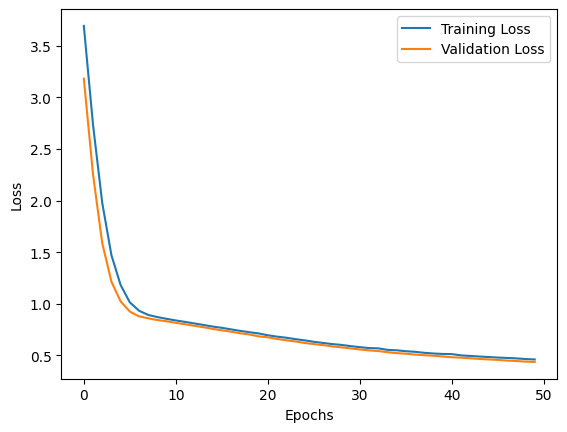

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Eğitim ve doğrulama doğruluğunu görselleştirme

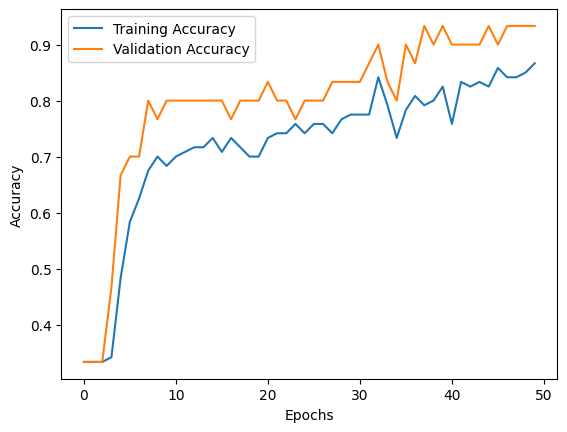

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Test verisi değiştirme etkisi

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.4, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, train_labels, epochs=50, batch_size=5, validation_data=(test_data, test_labels),verbose=0)


In [ ]:
loss, accuracy = model.evaluate(test_data, test_labels)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

2/2 [==============================] - 0s 8ms/step - loss: 0.4805 - accuracy: 0.8167
Test Loss: 0.48049262166023254
Test Accuracy: 0.8166666626930237


## Model 2
Daha karmaşık bir model ile değerlendirelim

In [ ]:
model2 = Sequential()
model2.add(Dense(10, input_dim=4, activation='relu'))
model2.add(Dense(10, input_dim=4, activation='relu'))
model2.add(Dense(10, input_dim=4, activation='relu'))
model2.add(Dense(3, activation='softmax'))

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model2.fit(train_data, train_labels, epochs=50, batch_size=5, validation_data=(test_data, test_labels),verbose=0)

In [ ]:
loss, accuracy = model.evaluate(test_data, test_labels)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

2/2 [==============================] - 0s 7ms/step - loss: 0.4805 - accuracy: 0.8167
Test Loss: 0.48049262166023254
Test Accuracy: 0.8166666626930237


In [ ]:
loss, accuracy = model.evaluate(test_data, test_labels)
loss2, accuracy2 = model2.evaluate(test_data, test_labels)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

print(f'Test Loss: {loss2}')
print(f'Test Accuracy: {accuracy2}')

2/2 [==============================] - 0s 11ms/step - loss: 0.1209 - accuracy: 0.9667
Test Loss: 0.48049262166023254
Test Accuracy: 0.8166666626930237
Test Loss: 0.12093450129032135
Test Accuracy: 0.9666666388511658
